In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('User_BuysVenture.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0.0
1,15810944,Male,35,20000.0,0.0
2,15668575,Female,26,43000.0,0.0
3,15603246,Female,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


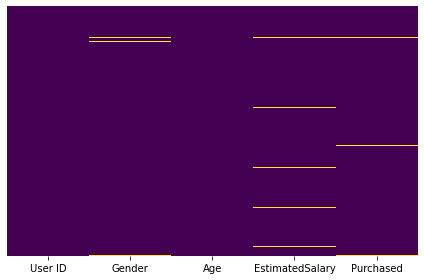

In [3]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [4]:
#Data Preprocessing - droping rows with NaN Values
df = df.dropna()
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0.0
1,15810944,Male,35,20000.0,0.0
2,15668575,Female,26,43000.0,0.0
3,15603246,Female,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


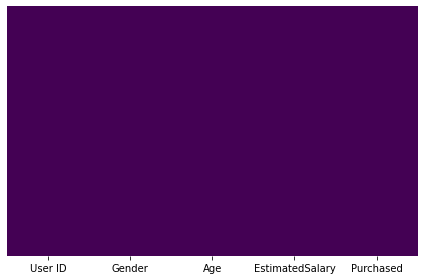

In [5]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df) 

In [6]:
#Data Preprocessing

from sklearn import preprocessing

#Label Encoding
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

df.Purchased = LE.fit_transform(df.Purchased)
df.Gender = LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000.0,0
1,15810944,1,35,20000.0,0
2,15668575,0,26,43000.0,0
3,15603246,0,27,57000.0,0
4,15804002,1,19,76000.0,0


In [7]:
#drop unrequired columns
df = df.drop('User ID',axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0
1,1,35,20000.0,0
2,0,26,43000.0,0
3,0,27,57000.0,0
4,1,19,76000.0,0


In [8]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2
0,1.018447,-1.808167,-1.489254
1,1.018447,-0.246000,-1.459847
2,-0.981887,-1.124719,-0.783478
3,-0.981887,-1.027084,-0.371776
4,1.018447,-1.808167,0.186963


In [9]:
data_scaled.columns=['Gender','Age','EstimatedSalary']
data_scaled.head()

,Gender,Age,EstimatedSalary
0,1.018447,-1.808167,-1.489254
1,1.018447,-0.246000,-1.459847
2,-0.981887,-1.124719,-0.783478
3,-0.981887,-1.027084,-0.371776
4,1.018447,-1.808167,0.186963


In [10]:
data_scaled['Class'] = df.Purchased

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0
1,1,35,20000.0,0
2,0,26,43000.0,0
3,0,27,57000.0,0
4,1,19,76000.0,0


In [12]:
data_scaled = data_scaled[data_scaled['Class'].notna()]
#Loading the data
X = data_scaled.iloc[:,0:3]
Y = data_scaled.iloc[:,3:4]

In [13]:
#Splitting the dataset
#Splitting the dataset into Train & Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
X_train

,Gender,Age,EstimatedSalary
133,1.018447,-1.808167,-1.312810
298,-0.981887,0.437447,0.010519
304,-0.981887,1.609072,1.010368
161,1.018447,-0.831813,2.304290
62,1.018447,-1.319990,-0.342369
...,...,...,...
266,1.018447,1.120895,0.539851
137,1.018447,-0.734178,0.569258
259,1.018447,0.242177,-0.254147
158,-0.981887,-1.905803,0.481036


In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.])

In [16]:
y_test

,Class
108,0.0
345,0.0
249,1.0
24,1.0
140,0.0
...,...
129,0.0
222,1.0
23,1.0
217,0.0


In [17]:
y_train_pred=clf.predict(X_train)
y_train_pred

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [18]:
y_actual=np.array(y_train)
y_actual.flatten()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0.

In [19]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}

data=pd.DataFrame(data)
data

,y_pred,y_actual
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
290,1.0,0.0
291,0.0,1.0
292,0.0,1.0
293,0.0,0.0


In [20]:
df1=data_scaled
df1

,Gender,Age,EstimatedSalary,Class
0,1.018447,-1.808167,-1.489254,0.0
1,1.018447,-0.246000,-1.459847,0.0
2,-0.981887,-1.124719,-0.783478,0.0
3,-0.981887,-1.027084,-0.371776,0.0
4,1.018447,-1.808167,0.186963,0.0
...,...,...,...,...
378,-0.981887,0.144541,-0.312961,1.0
379,-0.981887,0.827989,-0.842293,1.0
380,1.018447,1.316166,-1.371625,0.0
381,-0.981887,1.218531,-1.459847,1.0


In [21]:
import math
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
#W4_new = 0

# Alpha - learning rate
a = 0.03

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z
for epoch in range(2):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])

    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
            
            
    # The error in prediction
    error = p_pred_exps - df1.Class
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1['Gender']
    error_x2 = error*df1['Age']
    error_x3 = error*df1['EstimatedSalary']
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)

    # Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class


In [22]:
df1

,Gender,Age,EstimatedSalary,Class,pred_class
0,1.018447,-1.808167,-1.489254,0.0,0.0
1,1.018447,-0.246000,-1.459847,0.0,0.0
2,-0.981887,-1.124719,-0.783478,0.0,0.0
3,-0.981887,-1.027084,-0.371776,0.0,0.0
4,1.018447,-1.808167,0.186963,0.0,0.0
...,...,...,...,...,...
378,-0.981887,0.144541,-0.312961,1.0,0.0
379,-0.981887,0.827989,-0.842293,1.0,0.0
380,1.018447,1.316166,-1.371625,0.0,0.0
381,-0.981887,1.218531,-1.459847,1.0,1.0


In [23]:
# True Positives: - Model Correctly predicts the positive class
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives: - positive outcomes that the model predicted incorrectly
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives: - Model Correctly predicts the Negative class
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives: - negative outcomes that the model predicted incorrectly
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  33
FP:  30
TN:  216
FN:  90


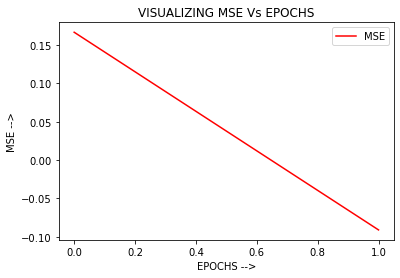

In [24]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title("VISUALIZING MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()